# **Proyecto 2 – Parte I (Core)**

# **Clasificación basada en arboles**

### **Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

# Parte I: Búsqueda y Análisis de Conjuntos de Datos

### **1. Búsqueda de Conjuntos de Datos:**
- Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
- Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

He seleccionado 4 datasets desde Kaggle de los siguientes link:

**Ataque al corazon:**
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download

**Venta de Tacos:**
https://www.kaggle.com/datasets/atharvasoundankar/taco-sales-dataset-20242025

**Spotify:**
https://www.kaggle.com/datasets/atharvasoundankar/spotify-global-streaming-data-2024

**CyberSeguridad:**
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

### **Análisis Exploratorio de Datos (EDA) Inicial:**
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.


In [2]:
# Importamos las librerias necesarias para analizar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**EDA Ataque al Corazon**

In [4]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_heart=pd.read_csv("heart.csv")
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,NaN,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
# Tambien vems que tiene 299 registros y que a la columna 'age' le falta uno, es decir tiene un NaN
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       298 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


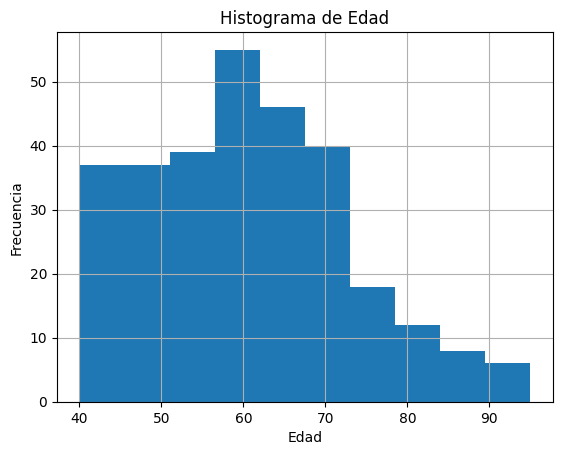

In [6]:
# Hacemos un histograma de age para ver la distribucion de los pacientes por edad
df_heart['age'].hist()
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La gran mayoria de los pacientes estan entre los 40 y 72 años aproximadamente, teniendo un gran mayoria entre los 57 y 62 años.

Tambien se aprecian algunos pacientes sobre los 90 años.

In [47]:
# obtengo estadistica de variables numericas
df_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,298.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.786356,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.886333,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


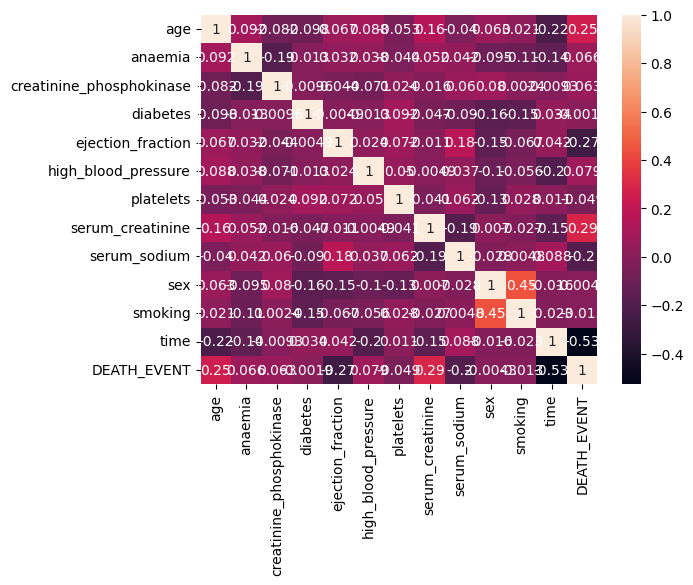

In [8]:
# Grafiremos un Mapa de Calor para buscar correlaciones
sns.heatmap(df_heart.corr(), annot=True)
plt.show()

El grafico muestra que no existen correspondencia fuerte entre las variables.

Personalmente, tenderia a pensar que la edad podria ser un factor preponderante con esta enfermedad, por no se ve en el mapa

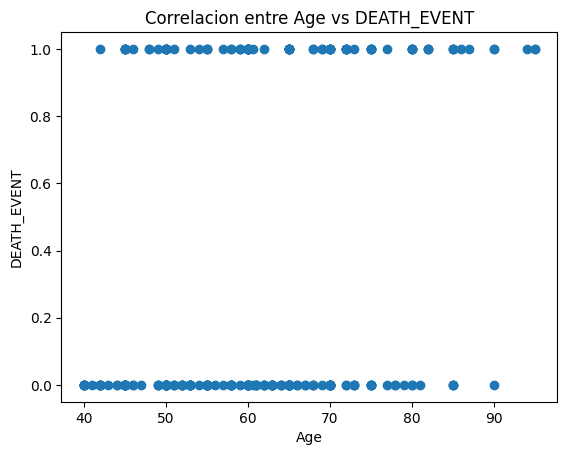

In [7]:
# Grafico scatter entre age y DEATH_EVENT
plt.scatter(df_heart['age'], df_heart['DEATH_EVENT'])
plt.title('Correlacion entre Age vs DEATH_EVENT')
plt.xlabel('Age')
plt.ylabel('DEATH_EVENT')
plt.show()



Reviso la rlacion entre edad y la efermedad, y compruebo que no existe correlacion

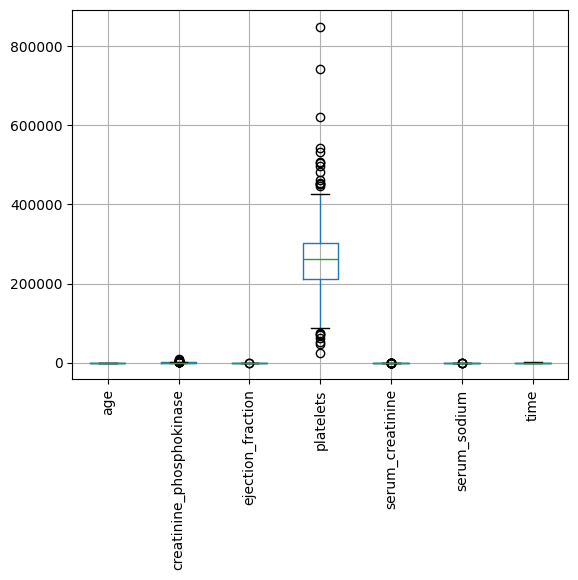

In [17]:
# Boxplot para analizar las columnas
df_heart.boxplot(column=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'])
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

Se pueden apreciar muchos valores outliers en la columna 'platelets'.

**EDA Taco Sales**

In [9]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_taco=pd.read_csv("taco_sales_2024-2025.csv")
df_taco.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [10]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
# Tambien vemos que tiene 1000 registros y no tiene valores NaN
df_taco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


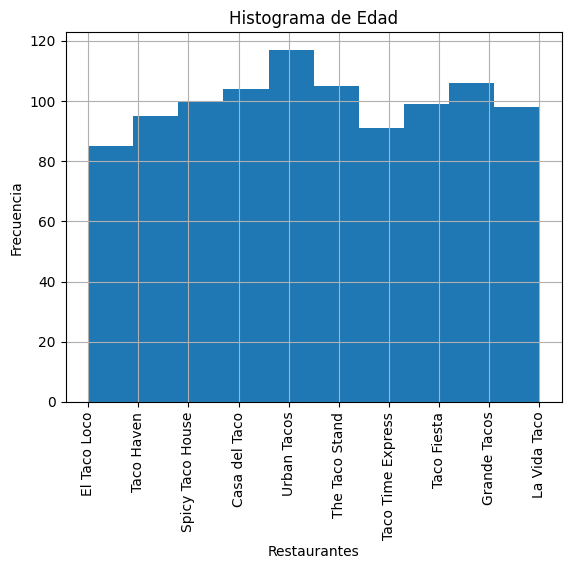

In [13]:
# Hacemos un histograma de age para ver la distribucion de los pacientes por edad
df_taco['Restaurant Name'].hist()
plt.title('Histograma de Edad')
plt.xlabel('Restaurantes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90) # Rota las leyendas de eje x
plt.show()

Podemos apreciar que si bien hay restaurantes que venden mas que otros, no es tanta la diferencia

In [48]:
# obtengo estadistica de variables numericas
df_taco.describe()

,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


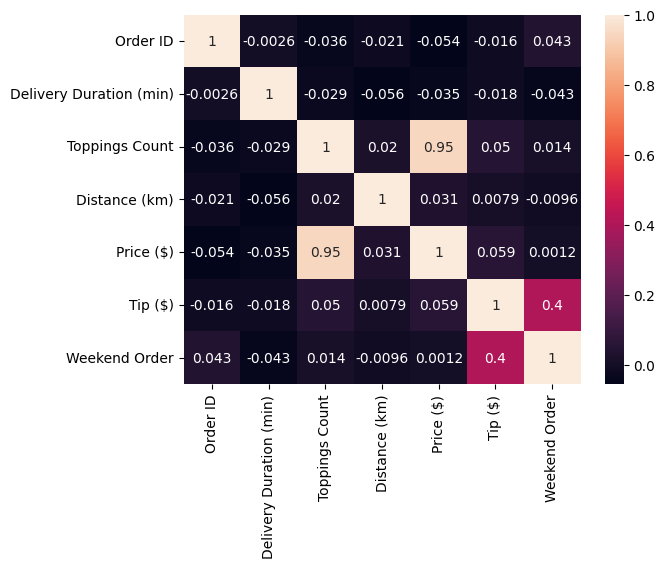

In [20]:
# Graficaremos un Mapa de Calor para buscar correlaciones en variable numericas
sns.heatmap(df_taco.corr(numeric_only=True), annot=True)
plt.show()

Vemos en el grafico que existe correlacion de un 95% entre las columnas Troppings Count y la columna Price ($).


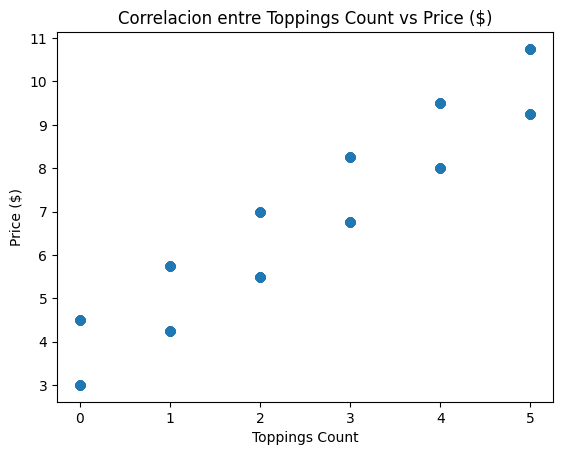

In [22]:
# Grafico scatter entre Troppings Count y Price ($)
plt.scatter(df_taco['Toppings Count'], df_taco['Price ($)'])
plt.title('Correlacion entre Toppings Count vs Price ($)')
plt.xlabel('Toppings Count')
plt.ylabel('Price ($)')
plt.show()

Se puede apreciar en el grafico que existe una relacion casi lineal

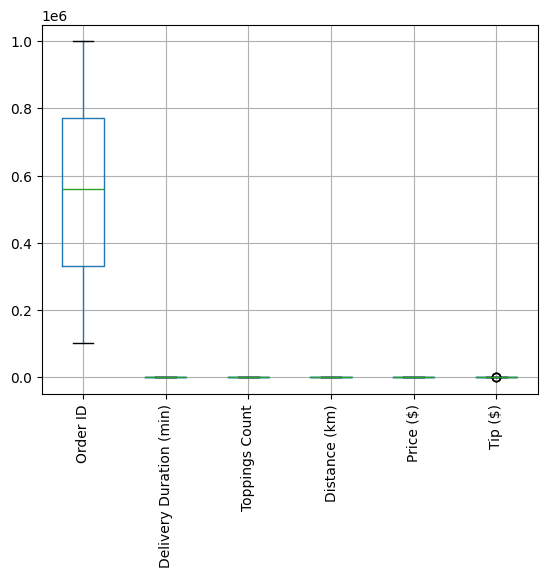

In [24]:
# Boxplot para analizar todas las columnas numericas del dataframe
df_taco.boxplot(column=df_taco.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()

No se parecian valores outliers

**EDA Spotify**

In [26]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_spotify=pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
df_spotify.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2022,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [27]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
# Tambien vemos que tiene 500 registros y no tiene valores NaN
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

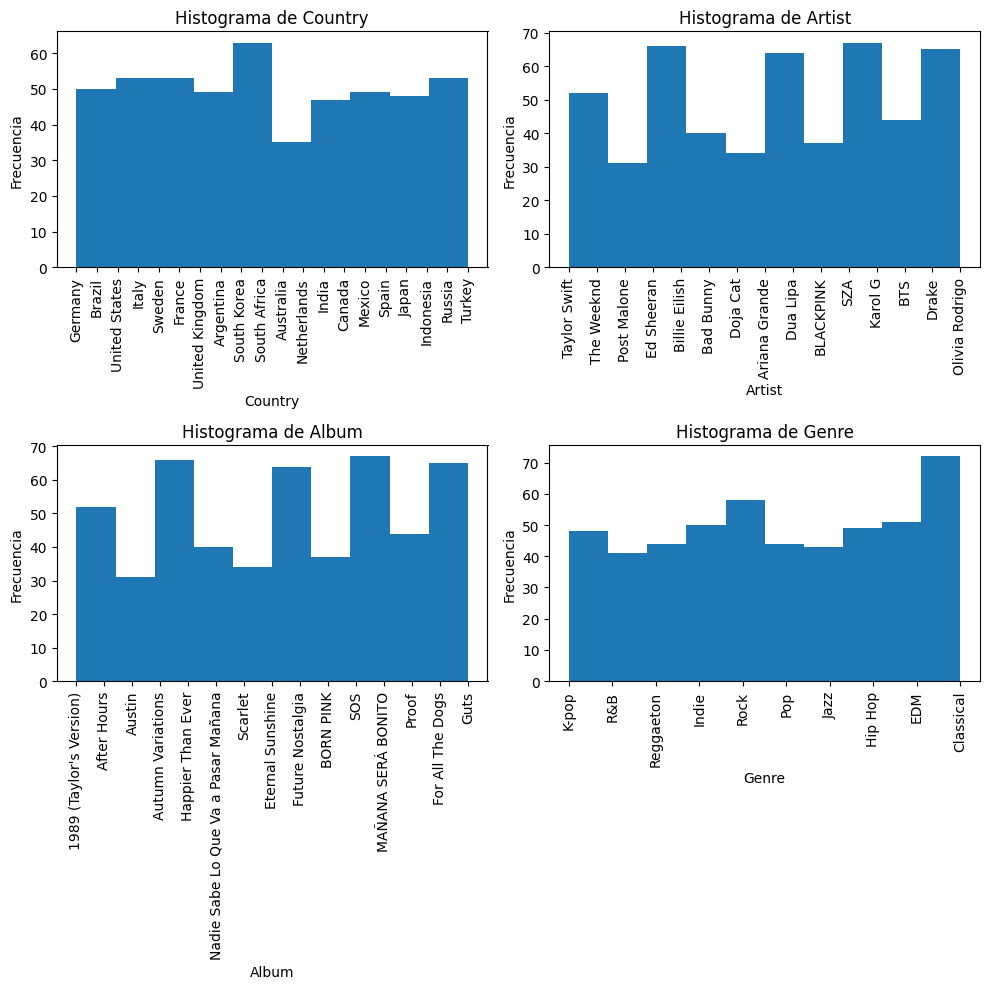

In [34]:
# subplot para histogramas de las columnas Country, Artist, Album y Genre
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_spotify['Country'])
axs[0, 0].set_title('Histograma de Country')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].hist(df_spotify['Artist'])
axs[0, 1].set_title('Histograma de Artist')
axs[0, 1].set_xlabel('Artist')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].hist(df_spotify['Album'])
axs[1, 0].set_title('Histograma de Album')
axs[1, 0].set_xlabel('Album')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].hist(df_spotify['Genre'])
axs[1, 1].set_title('Histograma de Genre')
axs[1, 1].set_xlabel('Genre')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout() # Ajusta el layout
plt.show()

Se hace un analisis de distribucion de las variables Country, Artist, Album y Genre

In [49]:
# obtengo estadistica de variables numericas
df_spotify.describe()

,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.488000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.671959,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


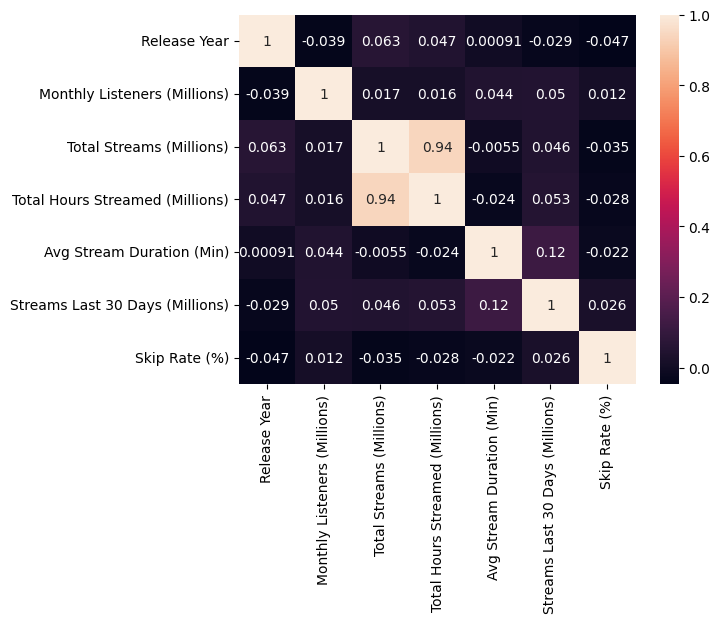

In [35]:
# Graficaremos un Mapa de Calor para buscar correlaciones en variable numericas
sns.heatmap(df_spotify.corr(numeric_only=True), annot=True)
plt.show()

Se puede apreciar una correlacion de un 94% entre las columnas Total Streams (Millions) y Total Hours Streamed (Millions)

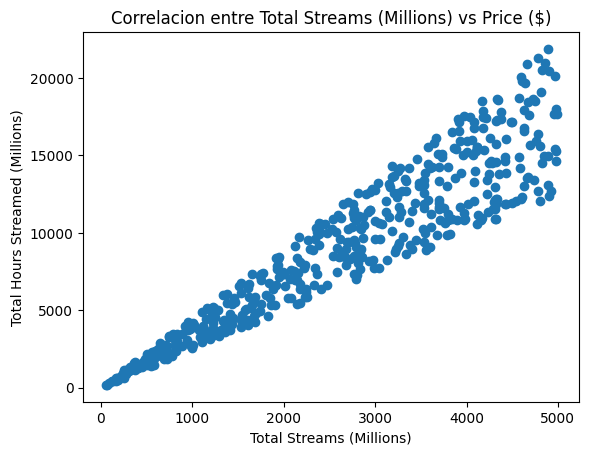

In [37]:
# Grafico scatter entre Total Streams (Millions) y Total Hours Streamed (Millions)
plt.scatter(df_spotify['Total Streams (Millions)'], df_spotify['Total Hours Streamed (Millions)'])
plt.title('Correlacion entre Total Streams (Millions) vs Price ($)')
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Total Hours Streamed (Millions)')
plt.show()

Se puede apreciar en el grafico que existe una relacion casi lineal

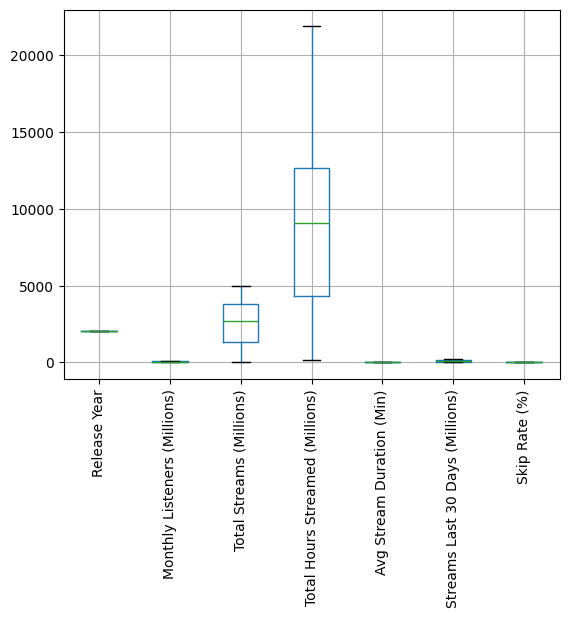

In [39]:
# Boxplot para analizar todas las columnas numericas del dataframe
df_spotify.boxplot(column=df_spotify.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()

Se puede apreciar que no existen valores outliers, aunque la columna 'Streams Last 30 Days (Millions)' no se puede apreciar bien, por la escala de los valores.  Se graficara por separado.

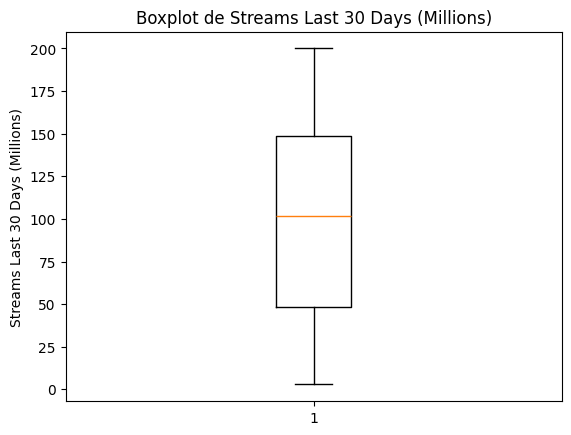

In [40]:
# boxplot para la columna Streams Last 30 Days (Millions)
plt.boxplot(df_spotify['Streams Last 30 Days (Millions)'])
plt.title('Boxplot de Streams Last 30 Days (Millions)')
plt.ylabel('Streams Last 30 Days (Millions)')
plt.show()

Se aprecia que la columna Streams Last 30 Days (Millions) no presenta valores outliers

**EDA Global CyberSecurity**

In [41]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_cyber=pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
df_cyber.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [42]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
# Tambien vemos que tiene 3000 registros y no tiene valores NaN
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


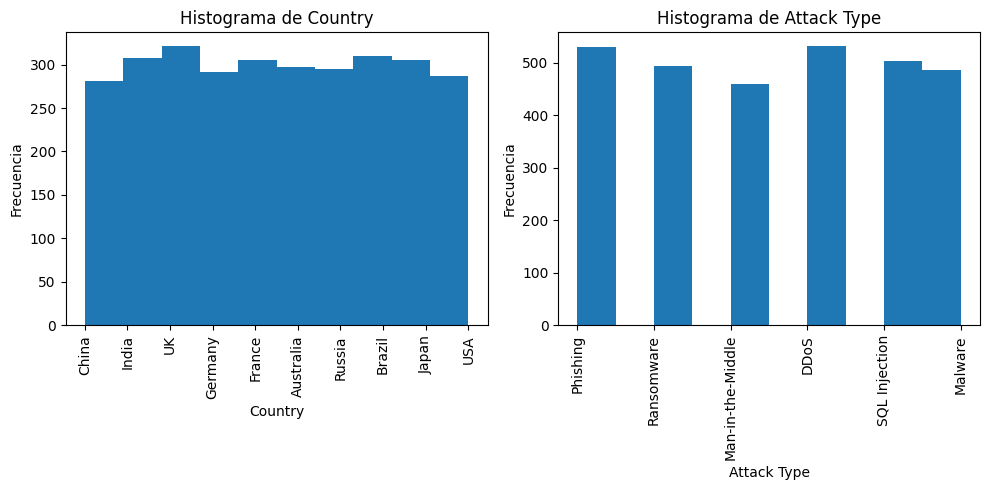

In [44]:
# subplot para histogramas de las columnas Country y Attack Type
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df_cyber['Country'])
axs[0].set_title('Histograma de Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Frecuencia')
axs[0].tick_params(axis='x', rotation=90)
axs[1].hist(df_cyber['Attack Type'])
axs[1].set_title('Histograma de Attack Type')
axs[1].set_xlabel('Attack Type')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=90)
plt.tight_layout() # Ajusta el layout
plt.show()

Podemos apreciar cuales son los paises afectados por los Cyber Ataques y los tipos de ataques que se reciben

In [50]:
# se obtiene estadistica de columnas numericas
df_cyber.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


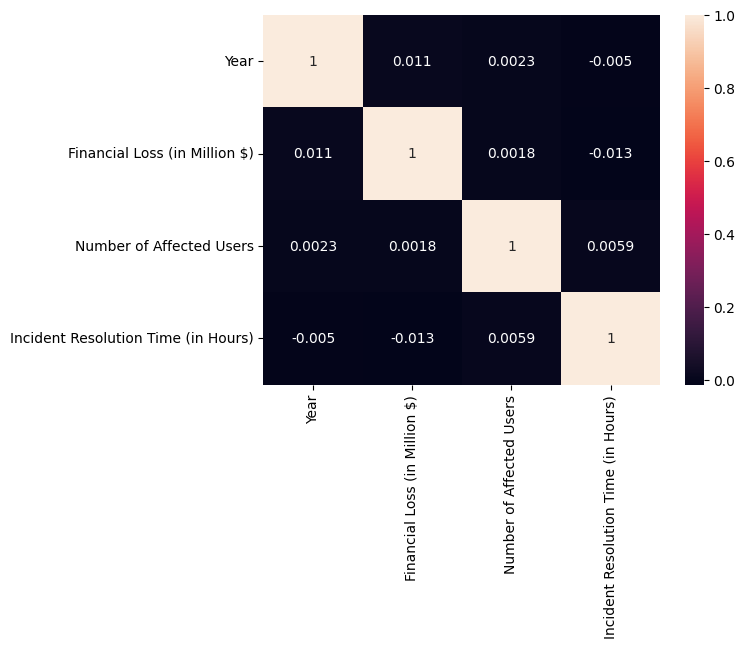

In [45]:
# Graficaremos un Mapa de Calor para buscar correlaciones en variable numericas
sns.heatmap(df_cyber.corr(numeric_only=True), annot=True)
plt.show()

Vemos que no existe correlacion entre las variables

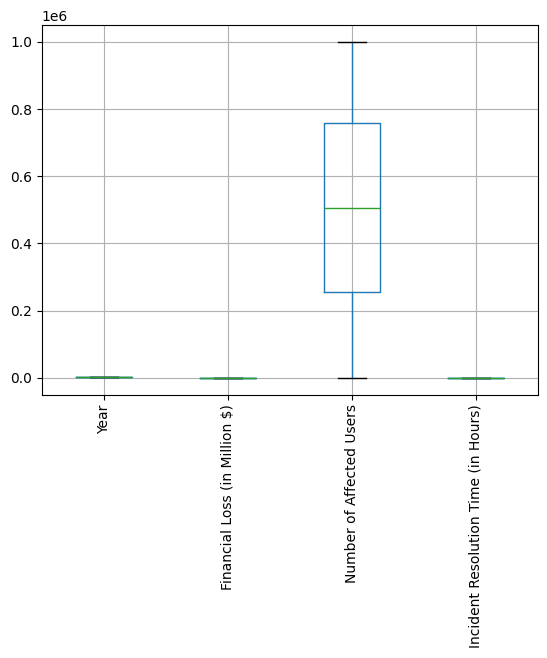

In [46]:
# Boxplot para analizar todas las columnas numericas del dataframe
df_cyber.boxplot(column=df_cyber.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()

Vemos que no tenemos valores outliers en las columnas

### **Diagnóstico y Selección de Problema:**

- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.

Haciendo un analisis de los diferentes datasets, veo que cada uno podria presentar desafios a la hora de profundizar en el analisis de los datos y de poder plantear un modelo predictivo.

No vi, excepto en un dataframe que habia solo un valor nulo, los otros estaban completos. Tambien vi en un modelo datos outlier, pero al desconocer temas medicos no puedo dar un juicio de su legitimidad.

AL momento de seleccionar un dataframe, tomare el de **Heart**. Baso mi eleccion en que me llama la atencion conocer temas medicos y poder predecir en base a sintomas cuan probable es que un paciente pueda tener o no dicha enfermedad. Creo que esto aplicaria a cualquier enfermedad, teniendo los datos adecuados para su estudio.